In [91]:
import pandas as pd

import statsmodels.api as sm
import pandas as pd
import datetime
from pathlib import Path

pd.set_option("display.max_columns", None)
# !pip install statsmodels


# %config InlineBackend.figure_format = "svg"
# %config InlineBackend.print_figure_kwargs = {"dpi" : 300}
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


# from cadFace.vis import percentiles_plot
import sci_palettes

try:
    sci_palettes.register_cmap()
except:
    pass
import scienceplots
from pathlib import Path
import pandas as pd
from ppp_aging.ppp_model import *

plt.style.use(["nature", "no-latex"])
sns.set_context("paper", font_scale=1.5)
sns.set_palette("nejm")
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')
import scienceplots

plt.style.use(["nature", "no-latex"])
import cuml



In [92]:
# pkls = {Path(i.name).stem: str(i) for i in Path("./1_regression_models").glob("*.pkl")}
# # pkls/
# result_dict = pd.read_pickle(pkls["single_surivival_sig_risk_factors_PRS"])

# from collections import defaultdict

# new_dict = defaultdict()

# key_map = (
#     pd.read_csv("auc_df.csv")[["feature", "combination"]]
#     .set_index("feature")
#     .to_dict()["combination"]
# )

# for k, v in result_dict.items():
#     new_dict[key_map.get(k, k)] = v

# import pickle

# pickle.dump(new_dict, open("4_all_model_ml.pkl", "wb"))

In [93]:
def add_k_year_follow(df, k=5, unit="month"):

    assert unit in ["month", "year", "day"]
    year_of_cad_after_recuit = "year_of_cad_after_recuit"
    E = f"{k}_years_cad"
    T = f"{k}_years_cad_{unit}"

    df[E] = (df[year_of_cad_after_recuit] <= k).astype(int)

    def survive_time(x):
        cad_date = x["cad_date"]
        death_date = x["death_date"]
        recuit_date = x["recuit_date"]

        if x[E] == 1:  # K年内得了冠心病
            days = (cad_date - recuit_date).days
        elif x[E] == 0:  # K年没有冠心病
            if pd.notnull(death_date):
                death_times_after_recuit = (death_date - recuit_date).days
                if death_times_after_recuit <= k * 365:  # K年内死亡了
                    days = death_times_after_recuit
                else:
                    days = k * 365  # 死亡了，但是没在k年内
            else:
                days = k * 365  # 直到隨訪結束也沒有死
        if unit == "month":
            return days / 30
        elif unit == "year":
            return days / 365
        else:
            return days

    df[T] = df.apply(survive_time, axis=1)
    return df, E, T

In [94]:
model_obj = pd.read_pickle("4_all_model_ml.pkl")
model_obj

defaultdict(None,
            {'AS': {'model': Lasso(),
              'train_metrics': {'train_auc': 0.7182158786384111},
              'test_metrics': {'test_auc': 0.7168387244315457},
              'train_data':        incident_cad   age  sex  incident_cad_pred
              35871             1  66.0  1.0           0.115118
              21756             0  51.0  0.0           0.013514
              29839             0  57.0  1.0           0.083159
              3986              0  58.0  1.0           0.086710
              16503             0  64.0  1.0           0.108016
              ...             ...   ...  ...                ...
              33528             0  53.0  0.0           0.020616
              39561             0  61.0  0.0           0.049024
              17032             0  66.0  1.0           0.115118
              2360              0  68.0  0.0           0.073881
              16740             1  51.0  1.0           0.061853
              
              [40

In [95]:
combination_dict = pd.read_pickle("4_combination_dict.pkl")
combination_dict

defaultdict(None,
            {'all_protein': ['C3',
              'KLK7',
              'GCHFR',
              'NHLRC3',
              'APOD',
              'GAPDH',
              'TP53I3',
              'CPA4',
              'ANXA2',
              'GRSF1',
              'IL25',
              'HMMR',
              'MRPL52',
              'PAIP2B',
              'THAP12',
              'FOS',
              'FGF9',
              'PITHD1',
              'THSD1',
              'PTGES2',
              'DEFB103A_DEFB103B',
              'ATP1B4',
              'CYB5A',
              'UNC79',
              'SLC34A3',
              'TAGLN3',
              'SLIRP',
              'CLASP1',
              'PSMC3',
              'KIR3DL2',
              'BEX3',
              'PFDN4',
              'BCL7A',
              'SMC3',
              'SLC28A1',
              'CDC123',
              'GJA8',
              'NMRK2',
              'GATA3',
              'CPLX2',
              'RASGRF1',
       

In [96]:
# import json

# combination_json = json.load(open("1_X_combination_dict.json"))
# from collections import defaultdict

# new_dict = defaultdict()

# key_map = (
#     pd.read_csv("auc_df.csv")[["feature", "combination"]]
#     .set_index("feature")
#     .to_dict()["combination"]
# )

# for k, v in combination_json.items():
#     new_dict[key_map.get(k, k)] = v
# new_dict

# import pickle
# pickle.dump(new_dict, open("4_combination_dict.pkl", "wb"))

In [97]:
combination_dict.keys()

dict_keys(['all_protein', 'all_protein_age_sex', 'all_protein_risk_factors', 'AS', 'RF', 'PRS + AS', 'PRS + RF', 'LR', 'LR(P_cutoff)', 'COX', 'COX(P_cutoff)', 'LR + RF', 'LR + RF +PRS', 'LR(P_cutoff) + RF', 'LR(P_cutoff) + RF + PRS', 'COX + RF', 'COX + RF + PRS', 'COX(P_cutoff) + RF', 'COX(P_cutoff) + RF + PRS', 'LR(P_cutoff) + COX(P_cutoff) ', 'LR(P_cutoff) + COX(P_cutoff) + RF', 'LR(P_cutoff) + COX(P_cutoff) + RF + PRS'])

In [133]:
test_imputed = pd.read_pickle("1_test_imputed.pkl")
train_imputed = pd.read_pickle("1_train_imputed.pkl")
test_imputed = test_imputed.dropna(subset=combination_dict["RF"]).reset_index(drop=True)
test_imputed

sex  height  weight       BSA  genotype_array   age      PC1        PC2  \
0     1.0   171.0    64.2  1.746282               2  44.0  71.3002 -100.66700   
1     0.0   165.0    55.8  1.599219               2  53.0 -12.4815    3.16181   
2     1.0   171.0    77.3  1.916181               2  62.0 -11.4721    2.20519   
3     0.0   171.0    73.8  1.872298               2  53.0 -13.8051    5.46987   
4     0.0   177.0    71.0  1.868377               2  52.0  22.6608  -11.82330   
...   ...     ...     ...       ...             ...   ...      ...        ...   
8293  1.0   194.0   111.5  2.451247               2  59.0 -11.2401    6.36919   
8294  0.0   156.0    56.2  1.560555               2  47.0  89.6502 -130.82500   
8295  0.0   160.0    64.0  1.686548               2  61.0 -13.2795    4.90337   
8296  1.0   184.0   104.1  2.306657               2  67.0 -14.3129    1.37825   
8297  0.0   159.0    56.8  1.583877               2  41.0 -11.2361    4.63863   

            PC3        PC4        PC5       PC6        PC7        PC8  \
0     81.855800   9.994410  -0.516576  4.576150   1.832860   5.045020   
1     -3.999700   0.309314  -6.865420 -1.982800  -1.245250   1.828070   
2      0.205421  -1.035540  -2.391010 -2.383070   0.886641  -0.934631   
3     -4.307390   2.966630  -1.338870 -1.425630   0.249275  -2.754040   
4     28.726600 -80.967500  13.824100 -7.574850 -27.455600 -15.176200   
...         ...        ...        ...       ...        ...        ...   
8293  -1.454640   0.493263  -3.298270 -2.062050  -2.349110  -1.497980   
8294  94.235400  28.885200  -3.609980 -6.661040  -4.625900  -6.542960   
8295  -1.680180   4.487020   9.191780 -0.761325   0.399757  -0.884922   
8296   2.037820   0.217533   1.904070 -1.357880   0.266230   0.996555   
8297  -0.627089   0.635917  -5.071890  2.164910   0.770584  -1.732380   

          PC9       PC10  assessment_center  age_squared      BMI  dbp_a  \
0     1.61431  18.488800                  4       1936.0  21.9555   76.0   
1    -4.04044  -0.823290                 11       2809.0  20.4959  100.0   
2     1.41458   1.704540                  9       3844.0  26.4355   81.0   
3     5.32388  -2.011550                  3       2809.0  25.2385   76.0   
4    -1.99456   3.787430                  7       2704.0  22.6627   60.0   
...       ...        ...                ...          ...      ...    ...   
8293 -2.08661   0.895716                 20       3481.0  31.5248   72.0   
8294 -2.72082 -13.781000                  4       2209.0  23.0934   84.0   
8295 -1.60040  -2.621980                  8       3721.0  25.0000   81.0   
8296 -0.59830  -3.291160                  9       4489.0  30.7479   75.0   
8297 -1.51917  -4.123390                  4       1681.0  22.4675   82.0   

      sbp_a   tc_a   tg_a  hdl_a  ldl_a    dbp    sbp     tc     tg    hdl  \
0     115.0  5.851  0.893  1.635  3.549   76.0  115.0  5.851  0.893  1.635   
1     150.0  7.407  3.176  1.415  4.840  100.0  150.0  7.407  3.176  1.415   
2     144.0  5.909  1.869  1.670  3.587   81.0  144.0  5.909  1.869  1.670   
3     130.0  6.191  0.930  1.951  3.586   76.0  130.0  6.191  0.930  1.951   
4     106.0  5.411  0.766  1.675  3.369   60.0  106.0  5.411  0.766  1.675   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
8293  120.0  6.671  7.376  0.762  4.060   72.0  120.0  6.671  7.376  0.762   
8294  129.0  4.979  0.402  1.950  2.606   84.0  129.0  4.979  0.402  1.950   
8295  154.0  5.482  1.525  1.158  3.807   81.0  154.0  4.386  1.296  1.158   
8296  148.0  4.699  1.956  0.940  3.084   75.0  148.0  4.699  1.956  0.940   
8297  125.0  5.914  0.647  1.772  3.694   82.0  125.0  5.914  0.647  1.772   

        ldl   apob  cad  mi    crp        eGFR     Cr  CAD   cad_date  \
0     3.549  1.002    0   0   0.48  112.310853   69.9    0        NaT   
1     4.840  1.433    0   0   1.32   82.185961   74.9    0        NaT   
2     3.587  1.025    0   0   1.93   85.913239   87.7    0        NaT   
3     3.586  0

## define time 

In [134]:
test_imputed, E_3, T_3 = add_k_year_follow(test_imputed, k=3)
test_imputed, E_5, T_5 = add_k_year_follow(test_imputed, k=5)
test_imputed, E_10, T_10 = add_k_year_follow(test_imputed, k=10)

Text(0.5, 0, 'Months')

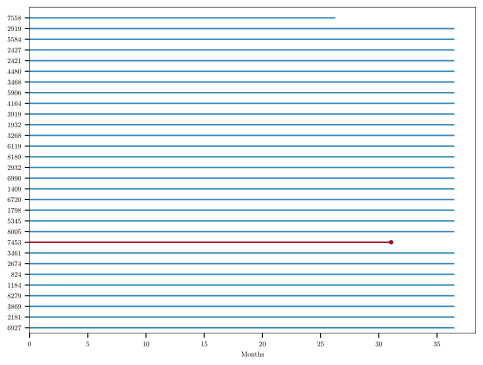

In [135]:
from lifelines.plotting import plot_lifetimes

E = E_3
T = T_3


test_imputed_sample = test_imputed.sample(n=30, random_state=10)
test_imputed_sample[E] = np.where(test_imputed_sample[E] == 1, True, False)
plt.figure(figsize=[8, 6])
ax = plot_lifetimes(
    test_imputed_sample[T],
    event_observed=test_imputed_sample[E],
    sort_by_duration=False,
)
ax.vlines(96, 0, 30, lw=2, linestyles="--", colors="black")
plt.xlabel("Months")

## get score of all models

In [136]:
# method = "LR"
from scipy.stats import logistic

for method in model_obj.keys():
    model = model_obj[method]["model"]
    if hasattr(model, "predict_proba"):
        train_pred = model.predict_proba(
            train_imputed[combination_dict[method]].dropna()
        ).iloc[
            :, 1
        ]  # NOTE: NA may caused by some features lost in train_imputed passed like age sex etc.
        pred_res = model.predict_proba(test_imputed[combination_dict[method]]).iloc[
            :, 1
        ]
    else:
        pred_res = model.predict(test_imputed[combination_dict[method]].values)
        train_pred = model.predict(
            train_imputed[combination_dict[method]].dropna().values
        )

    train_mean = train_pred.mean()
    train_std = train_pred.std()

    test_imputed[f"{method}:zscore"] = (pred_res - train_mean) / train_std
    test_imputed[f"{method}"] = logistic.cdf(test_imputed[f"{method}:zscore"])

In [137]:
test_with_score = test_imputed[
    [col for col in test_imputed if col not in combination_dict["all_protein"]]
]
del test_imputed
del train_imputed
test_with_score

,sex,height,weight,BSA,genotype_array,age,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,assessment_center,age_squared,BMI,dbp_a,sbp_a,tc_a,tg_a,hdl_a,ldl_a,dbp,sbp,tc,tg,hdl,ldl,apob,cad,mi,crp,eGFR,Cr,CAD,cad_date,birth_date,recuit_date,death_date,cad_age,death_age,recuit_age,year_of_cad_after_recuit,survival_time,is_earily_CAD,incident_cad,cad_status,prevalent_cad,future_cad_time_days,future_cad_time_months,future_cad_time_years,PRS,3_years_cad,3_years_cad_month,5_years_cad,5_years_cad_month,10_years_cad,10_years_cad_month,AS:zscore,AS,PRS + AS:zscore,PRS + AS,RF:zscore,RF,PRS + RF:zscore,PRS + RF,COX(P_cutoff):zscore,COX(P_cutoff),COX(P_cutoff) + RF:zscore,COX(P_cutoff) + RF,COX(P_cutoff) + RF + PRS:zscore,COX(P_cutoff) + RF + PRS,LR(P_cutoff):zscore,LR(P_cutoff),LR(P_cutoff) + COX(P_cutoff) :zscore,LR(P_cutoff) + COX(P_cutoff),LR(P_cutoff) + RF:zscore,LR(P_cutoff) + RF,LR(P_cutoff) + RF + PRS:zscore,LR(P_cutoff) + RF + PRS,LR(P_cutoff) + COX(P_cutoff) + RF:zscore,LR(P_cutoff) + COX(P_cutoff) + RF,LR(P_cutoff) + COX(P_cutoff) + RF + PRS:zscore,LR(P_cutoff) + COX(P_cutoff) + RF + PRS,LR:zscore,LR,LR + RF:zscore,LR + RF,LR + RF +PRS:zscore,LR + RF +PRS,COX:zscore,COX,COX + RF:zscore,COX + RF,COX + RF + PRS:zscore,COX + RF + PRS
0,1.0,171.0,64.2,1.746282,2,44.0,71.3002,-100.66700,81.855800,9.994410,-0.516576,4.576150,1.832860,5.045020,1.61431,18.488800,4,1936.0,21.9555,76.0,115.0,5.851,0.893,1.635,3.549,76.0,115.0,5.851,0.893,1.635,3.549,1.002,0,0,0.48,112.310853,69.9,0,NaT,1965-07-01,2010-06-18,NaT,NaN,NaN,44.994521,NaN,NaN,NaN,0.0,control,0.0,5027 days 14:04:12.210716,168.0,14.0,1.030583,0,36.5,0,60.833333,0,121.666667,-0.480385,0.382161,-0.381209,0.405835,-1.060096,0.257291,-0.991729,0.270571,0.206455,0.551431,-0.439283,0.391912,-0.404595,0.400209,0.184673,0.546037,0.265979,0.566106,-0.305723,0.424159,-0.367159,0.409228,-0.192719,0.451969,-0.160470,0.459968,-0.045318,0.488672,-0.600217,0.354294,-0.534429,0.369484,-0.059004,0.485253,-0.525711,0.371518,-0.527529,0.371093
1,0.0,165.0,55.8,1.599219,2,53.0,-12.4815,3.16181,-3.999700,0.309314,-6.865420,-1.982800,-1.245250,1.828070,-4.04044,-0.823290,11,2809.0,20.4959,100.0,150.0,7.407,3.176,1.415,4.840,100.0,150.0,7.407,3.176,1.415,4.840,1.433,0,0,1.32,82.185961,74.9,0,NaT,1955-11-01,2009-04-15,NaT,NaN,NaN,53.490411,NaN,NaN,NaN,0.0,control,0.0,5456 days 14:04:12.197517,182.0,15.0,2.192278,0,36.5,0,60.833333,0,121.666667,-0.911231,0.286748,0.731514,0.675137,-0.669630,0.338580,0.768636,0.683226,0.058193,0.514544,-0.488097,0.380342,0.778573,0.685373,-0.256029,0.436340,-0.321731,0.420254,-0.487900,0.380388,0.585134,0.642248,-0.510122,0.375165,0.528862,0.629218,-0.356682,0.411763,-0.342930,0.415098,0.595940,0.644727,-0.506555,0.376001,-0.493766,0.379007,0.530870,0.629686
2,1.0,171.0,77.3,1.916181,2,62.0,-11.4721,2.20519,0.205421,-1.035540,-2.391010,-2.383070,0.886641,-0.934631,1.41458,1.704540,9,3844.0,26.4355,81.0,144.0,5.909,1.869,1.670,3.587,81.0,144.0,5.909,1.869,1.670,3.587,1.025,0,0,1.93,85.913239,87.7,0,NaT,1947-10-01,2010-01-19,NaT,NaN,NaN,62.345205,NaN,NaN,NaN,0.0,control,0.0,5177 days 14:04:15.019627,173.0,15.0,0.653794,0,36.5,0,60.833333,0,121.666667,1.200839,0.768674,0.579206,0.640885,0.507607,0.624245,0.093280,0.523303,-0.002584,0.499354,0.040714,0.510177,-0.295128,0.426749,0.309323,0.576720,0.148710,0.537109,0.015925,0.503981,-0.160980,0.459842,-0.153968,0.461584,-0.416344,0.397392,0.422175,0.604004,0.309913,0.576864,-0.203834,0.449217,0.453884,0.611562,0.342743,0.584857,-0.226508,0.443614
3,0.0,171.0,73.8,1.872298,2,53.0,-13.8051,5.46987,-4.307390,2.966630,-1.338870,-1.425630,0.249275,-2.754040,5.32388,-2.011550,3,2809.0,25.2385,76.0,130.0,6.191,0.930,1.951,3.586,76.0,130.0,6.191,0.930,1.951,3.586,0.979,0,0,0.98,74.594805,81.2,0,NaT,1954-10-01,2008-04-22,NaT,NaN,NaN,53.594521,NaN,NaN,NaN,0.0,control,0.0,5814 days 14:04:12.805294,194.0,16.0,0.630562,0,36.5,0,60.833333,0,121.666667,-0.911231,0.286748,-1.257749,0.221362,-1.211462,0.229442,-1.320520,0.210732,-0.840119,0.301510,-

## 生存分析

In [ ]:
test_with_score["incident_cad"].value_counts()

In [85]:
# test_with_score["age_bin"] = pd.cut(
#     test_with_score["age"],
#     bins=[0, 45, 50, 55, 60, 65, 70],
#     labels=["0-45", "45-50", "50-55", "55-60", "60-65", "65-70"],
# )
test_with_score["age_bin"] = pd.cut(
    test_with_score["age"],
    bins=[0, 55, 65, 70],
    labels=["0-55", "55-65", "65-70"],
)

# show age bin dist
test_with_score.groupby(["age_bin"]).value_counts(["incident_cad"])

age_bin  incident_cad
0-55     0.0             3315
         1.0               88
55-65    0.0             3308
         1.0              220
65-70    0.0             1236
         1.0              131
dtype: int64

In [ ]:
methods = model_obj.keys()

methods

### 计算所有年龄区间的3,5，10年的生存分析

In [ ]:
from lifelines import CoxPHFitter
from collections import defaultdict
from ppp_aging.model import generate_states_cols

# for all test
cph = CoxPHFitter()
diff_methods_survival_list = []
for E, T in [[E_3, T_3], [E_5, T_5], [E_10, T_10]]:
    print(f"**************************E:{E} and T:{T}*************************")
    current_surivival_list = []
    for method in methods:
        var = f"{method}:zscore"
        tmp_df = test_with_score[[var, E, T]]
        cph.fit(tmp_df, duration_col=T, event_col=E)
        summary_df = cph.summary
        summary_df["N"] = tmp_df.shape[0]
        current_surivival_list.append(summary_df.loc[[var]])
        print(
            f"pvalue of {var}: {cph.summary['p'][var]}, < 0.05 {cph.summary['p'][var] < 0.05}"
        )
    current_stat = pd.concat(current_surivival_list).reset_index(drop=False)
    current_stat = generate_states_cols(current_stat, pvalue_col="p")
    current_stat["formatted_qval"] = current_stat["p"].apply(lambda x: f"{x:.2e}")
    current_stat["label"] = T
    diff_methods_survival_list.append(current_stat)
    print(f"**************************E:{E} and T:{T}*************************")

diff_methods_survival_df = pd.concat(diff_methods_survival_list).reset_index(drop=True)

In [ ]:
diff_methods_survival_df.head(2)

In [ ]:
diff_methods_survival_df["label"].unique().tolist()

In [ ]:
import forestplot as fp


fp.mforestplot(
    diff_methods_survival_df,
    estimate="exp(coef)",
    ll="exp(coef) lower 95%",
    hl="exp(coef) upper 95%",
    varlabel="covariate",
    # variable_header="Method",
    ylabel="",
    xlabel="exp(coef)",
    pval="q_values",
    figsize=(6, 10),
    # capitalize="capitalize",
    table=True,
    sort=True,
    sortby="exp(coef)",
    color_alt_rows=True,
    # ax=ax,
    # mcolor=["#CC6677", "#4477AA", "#CC6677"],
    mcolor=["#FAD02E", "#FF6B6B", "#C5E1A5"],
    model_col="label",
    modellabels=["3_years_cad_month", "5_years_cad_month", "10_years_cad_month"],
    # xlim=(2.4, 3.0),
    # return_df=True,
    # Additional kwargs for customizations
    **{
        "markersize": 30,
        # override default vertical offset between models (0.0 to 1.0)
        "offset": 0.35,
        "xlinestyle": (0, (10, 5)),  # long dash for x-reference line
        "xlinecolor": ".8",  # gray color for x-reference line
    },
)
plt.savefig("4_survival_forestplot.png", dpi=400, bbox_inches="tight")

In [ ]:
diff_methods_survival_df.to_csv("4_survival.csv", index=False)

#### 输出分数进行生存分析曲线绘制

In [ ]:
# from lifelines import CoxPHFitter
# from collections import defaultdict
# from ppp_aging.model import generate_states_cols


# cph = CoxPHFitter()
# diff_methods_survival_list = []
# for E, T in [[E_3, T_3], [E_5, T_5], [E_10, T_10]]:
#     print(f"**************************E:{E} and T:{T}*************************")
#     current_surivival_list = []
#     for method in methods:
#         var = f"{method}:zscore"
#         tmp_df = test_with_score[[var, E, T]]
#         cph.fit(tmp_df, duration_col=T, event_col=E)
#         summary_df = cph.summary
#         summary_df["N"] = tmp_df.shape[0]
#         current_surivival_list.append(summary_df.loc[[var]])
#         print(
#             f"pvalue of {var}: {cph.summary['p'][var]}, < 0.05 {cph.summary['p'][var] < 0.05}"
#         )
#     current_stat = pd.concat(current_surivival_list).reset_index(drop=False)
#     current_stat = generate_states_cols(current_stat, pvalue_col="p")
#     current_stat["formatted_qval"] = current_stat["p"].apply(lambda x: f"{x:.2e}")
#     current_stat["label"] = T
#     diff_methods_survival_list.append(current_stat)
#     print(f"**************************E:{E} and T:{T}*************************")

# diff_methods_survival_df = pd.concat(diff_methods_survival_list).reset_index(drop=True)

In [ ]:
len(methods)

In [ ]:
from lifelines import KaplanMeierFitter


def plot_KM_QT_k_percentile(plt_data, var, E, T, k=2, ax=None, **kwargs):
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 5))

    plt_data = plt_data[[var, E, T]].copy()
    plt_data[var].rank(pct=True, ascending=True)
    plt_data[f"{var}_bin"] = pd.cut(
        plt_data[var].rank(pct=True, ascending=True), bins=k
    )
    texts = ""
    for name, grouped_df in plt_data.groupby(f"{var}_bin"):
        kmf = KaplanMeierFitter()
        kmf.fit(grouped_df[T], event_observed=grouped_df[E], label=name)

        kmf.plot(ax=ax)
        texts += f"{name} have {E} {grouped_df[grouped_df[E] == 1].shape[0]}\n"

    ax.set_title(f"{var} vs {T} and {E} at each bin", fontsize=8)
    ax.legend(title=f"{var}_percentile", fontsize=8)

    ax.text(
        0.99,
        0.99,
        texts,
        fontsize=12,
        ha="right",
        va="top",
        transform=ax.transAxes,
        multialignment="left",
    )
    return ax

In [ ]:
fig, axes = plt.subplots(4, 5, figsize=(20, 20))
axes = axes.flatten()
sns.set_palette("nejm")
E = E_3
T = T_3
for idx, method in enumerate(methods):
    var = f"{method}:zscore"
    ax = axes[idx]
    plot_KM_QT_k_percentile(test_with_score, var, E, T, ax=ax)
    ax.set_title(f"{method}", fontsize=12)
    ax.legend(title=f"0~0.5 vs 0.5 ~ 1 percentile", fontsize=8)

fig.suptitle("3 years survival analysis")

In [ ]:
fig, axes = plt.subplots(4, 5, figsize=(20, 20))
axes = axes.flatten()
sns.set_palette("nejm")
E = E_5
T = T_5

for idx, method in enumerate(methods):
    var = f"{method}:zscore"
    ax = axes[idx]
    plot_KM_QT_k_percentile(test_with_score, var, E, T, ax=ax)
    ax.set_title(f"{method}", fontsize=12)
    ax.legend(title=f"0~0.5 vs 0.5 ~ 1 percentile", fontsize=8)

fig.suptitle("5 years survival analysis")

In [ ]:
fig, axes = plt.subplots(4, 5, figsize=(20, 20))
axes = axes.flatten()
sns.set_palette("nejm")
E = E_10
T = T_10

for idx, method in enumerate(methods):
    var = f"{method}:zscore"
    ax = axes[idx]
    plot_KM_QT_k_percentile(test_with_score, var, E, T, ax=ax)
    ax.set_title(f"{method}", fontsize=12)
    ax.legend(title=f"0~0.5 vs 0.5 ~ 1 percentile", fontsize=8)

fig.suptitle("10 years survival analysis")

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


def percentiles_plot(data, x, hue, k=10, ax=None, hue_map=None, color=None):
    """
    percentiles_plot plot percentiles bar plot, x is x y is x split by k+1 and each bin is hue by y

    Args:
        data (_type_): pd.Dataframe
        x (_type_): _description_
        y (_type_): _description_
        k (int, optional): k bins by percentiles . Defaults to 10.
        ax (_type_, optional): _description_. Defaults to None.

    Returns:
        _type_: _description_
    Examples:


    df = pd.read_csv("cadFace_resnet50_128_lion.csv")
    df["label"] = df["y"].apply(lambda x: "cad" if x == 1.0 else "control").astype("category").cat.set_categories(["cad", "control"])
    df["score"] = df["o"]

    fig, ax = plt.subplots(1,1, figsize=(6,4))
    ax = percentiles_plot(df, x="score", hue="label", k=10, ax=ax)

    plt.tight_layout()

    """
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 5))
    df = data.copy()[[x, hue]]
    if hue_map is not None:
        df[hue] = df[hue].map(hue_map)
    percentiles = np.linspace(0, 100, num=k + 1)  # 生成0到100的等差分位数
    thresholds = np.percentile(df[x].values, percentiles)
    # print(thresholds)
    df[x] = pd.cut(
        df[x],
        bins=thresholds,
        labels=[f"{i}%" for i in np.linspace(0, 100, num=k + 1)[1:]],
        include_lowest=True,
    )
    group_size = df.groupby([hue, x]).size().unstack()
    group_percent = group_size.apply(lambda x: x / x.sum(), axis=1)
    group_percent.apply(lambda x: x / x.sum(), axis=0).T.plot(
        kind="bar", stacked=True, ax=ax, color=color
    )

    return ax

In [ ]:
fig, axes = plt.subplots(4, 5, figsize=(20, 20))
axes = axes.flatten()
sns.set_palette("nejm")
E = E_3
T = T_3

for idx, method in enumerate(methods):
    var = f"{method}:zscore"
    ax = axes[idx]
    percentiles_plot(
        test_with_score, x=var, hue=E, k=10, ax=ax, hue_map={0: f"Control", 1: E}
    )

    ax.set_title(f"{method}", fontsize=12)


fig.tight_layout()

In [ ]:
fig, axes = plt.subplots(4, 5, figsize=(20, 20))
axes = axes.flatten()
sns.set_palette("nejm")
E = E_5
T = T_5

for idx, method in enumerate(methods):
    var = f"{method}:zscore"
    ax = axes[idx]
    percentiles_plot(
        test_with_score, x=var, hue=E, k=10, ax=ax, hue_map={0: f"Control", 1: E}
    )

    ax.set_title(f"{method}", fontsize=12)


fig.tight_layout()

In [ ]:
fig, axes = plt.subplots(4, 5, figsize=(20, 20))
axes = axes.flatten()
sns.set_palette("nejm")
E = E_10
T = T_10

for idx, method in enumerate(methods):
    var = f"{method}:zscore"
    ax = axes[idx]
    percentiles_plot(
        test_with_score, x=var, hue=E, k=10, ax=ax, hue_map={0: f"Control", 1: E}
    )

    ax.set_title(f"{method}", fontsize=12)


fig.tight_layout()

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax = percentiles_plot(test_with_score, x="LR:zscore", hue="incident_cad", k=10, ax=ax)

### 计算不同年龄区间的3,5,10年的生存分析

In [86]:
test_with_score

,sex,height,weight,BSA,genotype_array,age,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,assessment_center,age_squared,BMI,dbp_a,sbp_a,tc_a,tg_a,hdl_a,ldl_a,dbp,sbp,tc,tg,hdl,ldl,apob,cad,mi,crp,eGFR,Cr,CAD,cad_date,birth_date,recuit_date,death_date,cad_age,death_age,recuit_age,year_of_cad_after_recuit,survival_time,is_earily_CAD,incident_cad,cad_status,prevalent_cad,future_cad_time_days,future_cad_time_months,future_cad_time_years,PRS,3_years_cad,3_years_cad_month,5_years_cad,5_years_cad_month,10_years_cad,10_years_cad_month,AS:zscore,PRS + AS:zscore,RF:zscore,PRS + RF:zscore,COX(P_cutoff):zscore,COX(P_cutoff) + RF:zscore,COX(P_cutoff) + RF + PRS:zscore,LR(P_cutoff):zscore,LR(P_cutoff) + COX(P_cutoff) :zscore,LR(P_cutoff) + RF:zscore,LR(P_cutoff) + RF + PRS:zscore,LR(P_cutoff) + COX(P_cutoff) + RF:zscore,LR(P_cutoff) + COX(P_cutoff) + RF + PRS:zscore,LR:zscore,LR + RF:zscore,LR + RF +PRS:zscore,COX:zscore,COX + RF:zscore,COX + RF + PRS:zscore,age_bin
0,1.0,171.0,64.2,1.746282,2,44.0,71.3002,-100.66700,81.855800,9.994410,-0.516576,4.576150,1.832860,5.045020,1.61431,18.488800,4,1936.0,21.9555,76.0,115.0,5.851,0.893,1.635,3.549,76.0,115.0,5.851,0.893,1.635,3.549,1.002,0,0,0.48,112.310853,69.9,0,NaT,1965-07-01,2010-06-18,NaT,NaN,NaN,44.994521,NaN,NaN,NaN,0.0,control,0.0,5027 days 14:04:12.210716,168.0,14.0,1.030583,0,36.5,0,60.833333,0,121.666667,-0.480385,-0.381209,-1.060096,-0.991729,0.206455,-0.439283,-0.404595,0.184673,0.265979,-0.305723,-0.367159,-0.192719,-0.160470,-0.045318,-0.600217,-0.534429,-0.059004,-0.525711,-0.527529,0-55
1,0.0,165.0,55.8,1.599219,2,53.0,-12.4815,3.16181,-3.999700,0.309314,-6.865420,-1.982800,-1.245250,1.828070,-4.04044,-0.823290,11,2809.0,20.4959,100.0,150.0,7.407,3.176,1.415,4.840,100.0,150.0,7.407,3.176,1.415,4.840,1.433,0,0,1.32,82.185961,74.9,0,NaT,1955-11-01,2009-04-15,NaT,NaN,NaN,53.490411,NaN,NaN,NaN,0.0,control,0.0,5456 days 14:04:12.197517,182.0,15.0,2.192278,0,36.5,0,60.833333,0,121.666667,-0.911231,0.731514,-0.669630,0.768636,0.058193,-0.488097,0.778573,-0.256029,-0.321731,-0.487900,0.585134,-0.510122,0.528862,-0.356682,-0.342930,0.595940,-0.506555,-0.493766,0.530870,0-55
2,1.0,171.0,77.3,1.916181,2,62.0,-11.4721,2.20519,0.205421,-1.035540,-2.391010,-2.383070,0.886641,-0.934631,1.41458,1.704540,9,3844.0,26.4355,81.0,144.0,5.909,1.869,1.670,3.587,81.0,144.0,5.909,1.869,1.670,3.587,1.025,0,0,1.93,85.913239,87.7,0,NaT,1947-10-01,2010-01-19,NaT,NaN,NaN,62.345205,NaN,NaN,NaN,0.0,control,0.0,5177 days 14:04:15.019627,173.0,15.0,0.653794,0,36.5,0,60.833333,0,121.666667,1.200839,0.579206,0.507607,0.093280,-0.002584,0.040714,-0.295128,0.309323,0.148710,0.015925,-0.160980,-0.153968,-0.416344,0.422175,0.309913,-0.203834,0.453884,0.342743,-0.226508,55-65
3,0.0,171.0,73.8,1.872298,2,53.0,-13.8051,5.46987,-4.307390,2.966630,-1.338870,-1.425630,0.249275,-2.754040,5.32388,-2.011550,3,2809.0,25.2385,76.0,130.0,6.191,0.930,1.951,3.586,76.0,130.0,6.191,0.930,1.951,3.586,0.979,0,0,0.98,74.594805,81.2,0,NaT,1954-10-01,2008-04-22,NaT,NaN,NaN,53.594521,NaN,NaN,NaN,0.0,control,0.0,5814 days 14:04:12.805294,194.0,16.0,0.630562,0,36.5,0,60.833333,0,121.666667,-0.911231,-1.257749,-1.211462,-1.320520,-0.840119,-1.147182,-1.224442,-0.701019,-0.746640,-0.920147,-1.038216,-0.940593,-1.030351,-1.227985,-1.187126,-0.990572,-1.318706,-1.267770,-1.035293,0-55
4,0.0,177.0,71.0,1.868377,2,52.0,22.6608,-11.82330,28.726600,-80.967500,13.824100,-7.574850,-27.455600,-15.176200,-1.99456,3.787430,7,2704.0,22.6627,60.0,106.0,5.411,0.766,1.675,3.369,60.0,106.0,5.411,0.766,1.675,3.369,0.915,0,0,1.01,112.354046,44.9,0,NaT,1956-02-01,2008-10-02,NaT,NaN,NaN,52.704110,NaN,NaN,NaN,0.0,control,0.0,5651 days 14:04:12.322842,189.0,16.0,0.940837,0,36.5,0,60.833333,0,121.666667,-1.004632,-0.942551,-1.166783,-1.133391,-1.234303,-1.265021,-1.204365,-1.441935,-1.371169,-1.375123,-1.326991,-1.326839,-1.249809,-1.569217,-1.488347,-1.347215,-1.530033,-1.476962,-1.342805,0-55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [87]:
from lifelines import CoxPHFitter
from collections import defaultdict
from ppp_aging.model import generate_states_cols

# for all test
cph = CoxPHFitter()
age_bin_result = []
for age_bin, age_bin_df in test_with_score.groupby("age_bin"):
    diff_methods_survival_list = []
    print(f"**************************age_bin:{age_bin}*************************")
    for E, T in [
        [E_3, T_3],
        [E_5, T_5],
        [E_10, T_10],
        ["incident_cad", "future_cad_time_months"],
    ]:
        print(f"**************************E:{E} and T:{T}*************************")
        current_surivival_list = []
        for method in methods:
            var = f"{method}:zscore"
            tmp_df = age_bin_df[[var, E, T]]
            cph.fit(tmp_df, duration_col=T, event_col=E)
            summary_df = cph.summary
            summary_df["N"] = tmp_df.shape[0]
            summary_df["n_control"] = (tmp_df[E] == 0).sum()
            summary_df["n_case"] = (tmp_df[E] == 1).sum()
            summary_df["c_index"] = cph.concordance_index_
            current_surivival_list.append(summary_df.loc[[var]])
            print(
                f"pvalue of {var}: {cph.summary['p'][var]}, < 0.05 {cph.summary['p'][var] < 0.05}"
            )

        current_stat = pd.concat(current_surivival_list).reset_index(drop=False)
        current_stat = generate_states_cols(current_stat, pvalue_col="p")
        current_stat["formatted_qval"] = current_stat["p"].apply(lambda x: f"{x:.2e}")
        current_stat["label"] = T
        diff_methods_survival_list.append(current_stat)
        print(f"**************************E:{E} and T:{T}*************************")

    diff_methods_survival_df = pd.concat(diff_methods_survival_list).reset_index(
        drop=True
    )
    diff_methods_survival_df["age_bin"] = age_bin

    age_bin_result.append(diff_methods_survival_df)
age_bin_result_df = pd.concat(age_bin_result).reset_index(drop=True)

**************************age_bin:0-55*************************
**************************E:3_years_cad and T:3_years_cad_month*************************
pvalue of AS:zscore: 0.009421934483912563, < 0.05 True
pvalue of PRS + AS:zscore: 4.467374649766941e-05, < 0.05 True
pvalue of RF:zscore: 0.0556705887788613, < 0.05 False
pvalue of PRS + RF:zscore: 0.00035859048399344287, < 0.05 True
pvalue of COX(P_cutoff):zscore: 5.706849042834912e-06, < 0.05 True
pvalue of COX(P_cutoff) + RF:zscore: 3.293814137524949e-06, < 0.05 True
pvalue of COX(P_cutoff) + RF + PRS:zscore: 1.271825857214147e-07, < 0.05 True
pvalue of LR(P_cutoff):zscore: 0.001112861845563286, < 0.05 True
pvalue of LR(P_cutoff) + COX(P_cutoff) :zscore: 0.0006568204957706213, < 0.05 True
pvalue of LR(P_cutoff) + RF:zscore: 0.0001846031962369321, < 0.05 True
pvalue of LR(P_cutoff) + RF + PRS:zscore: 3.383337009374729e-06, < 0.05 True
pvalue of LR(P_cutoff) + COX(P_cutoff) + RF:zscore: 0.00010446076680586349, < 0.05 True
pvalue of LR

In [44]:
age_bin_result_df.query(
    "age_bin == '65-70' & covariate in ['LR + RF +PRS:zscore','LR(P_cutoff) + RF + PRS:zscore','COX + RF + PRS:zscore','COX(P_cutoff) + RF + PRS:zscore','PRS + RF:zscore','RF:zscore','AS:zscore','COX:zscore','COX(P_cutoff):zscore','LR:zscore','LR(P_cutoff)']"
)

,covariate,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,cmp to,z,p,-log2(p),N,n_case,n_control,LOG10P,q_values,reject,markers,formatted_qval,label,age_bin
380,AS:zscore,1.232182,3.428702,0.378645,0.490051,1.974313,1.632399,7.201667,0.0,3.254186,1.137178e-03,9.780326,1367,1340,27,2.944171,1.137178e-03,True,*,1.14e-03,3_years_cad_month,65-70
382,RF:zscore,0.994555,2.703520,0.302132,0.402387,1.586722,1.495390,4.887703,0.0,3.291788,9.955246e-04,9.972255,1367,1340,27,3.001948,1.050831e-03,True,*,9.96e-04,3_years_cad_month,65-70
383,PRS + RF:zscore,1.158081,3.183817,0.309569,0.551336,1.764826,1.735570,5.840554,0.0,3.740940,1.833333e-04,12.413244,1367,1340,27,3.736759,2.488095e-04,True,**,1.83e-04,3_years_cad_month,65-70
384,COX(P_cutoff):zscore,0.687336,1.988412,0.203513,0.288458,1.086214,1.334368,2.963035,0.0,3.377359,7.318558e-04,10.416153,1367,1340,27,3.135574,8.179565e-04,True,**,7.32e-04,3_years_cad_month,65-70
386,COX(P_cutoff) + RF + PRS:zscore,1.265274,3.544063,0.292743,0.691508,1.839039,1.996725,6.290490,0.0,4.322135,1.545269e-05,15.981783,1367,1340,27,4.810996,7.495935e-05,True,***,1.55e-05,3_years_cad_month,65-70
390,LR(P_cutoff) + RF + PRS:zscore,1.251086,3.494135,0.285808,0.690912,1.811260,1.995534,6.118149,0.0,4.377360,1.201252e-05,16.345102,1367,1340,27,4.920366,7.495935e-05,True,***,1.20e-05,3_years_cad_month,65-70
393,LR:zscore,0.988972,2.688469,0.242523,0.513636,1.464308,1.671357,4.324552,0.0,4.077848,4.545455e-05,14.425216,1367,1340,27,4.342423,7.495935e-05,True,***,4.55e-05,3_years_cad_month,65-70
395,LR + RF +PRS:zscore,1.173786,3.234215,0.280114,0.624772,1.722800,1.867821,5.600187,0.0,4.190384,2.784832e-05,15.132050,1367,1340,27,4.555201,7.495935e-05,True,***,2.78e-05,3_years_cad_month,65-70
396,COX:zscore,0.991152,2.694335,0.244748,0.511454,1.470849,1.667714,4.352930,0.0,4.049679,5.128798e-05,14.251020,1367,1340,27,4.289984,7.495935e-05,True,***,5.13e-05,3_years_cad_month,65-70
398,COX + RF + PRS:zscore,1.172715,3.230753,0.279492,0.624921,1.720510,1.868098,5.587377,0.0,4.195878,2.718164e-05,15.167008,1367,1340,27,4.565724,7.495935e-05,True,***,2.72e-05,3_years_cad_month,65-70


In [88]:
age_bin_result_df["age_bin"].unique()

array(['0-55', '55-65', '65-70'], dtype=object)

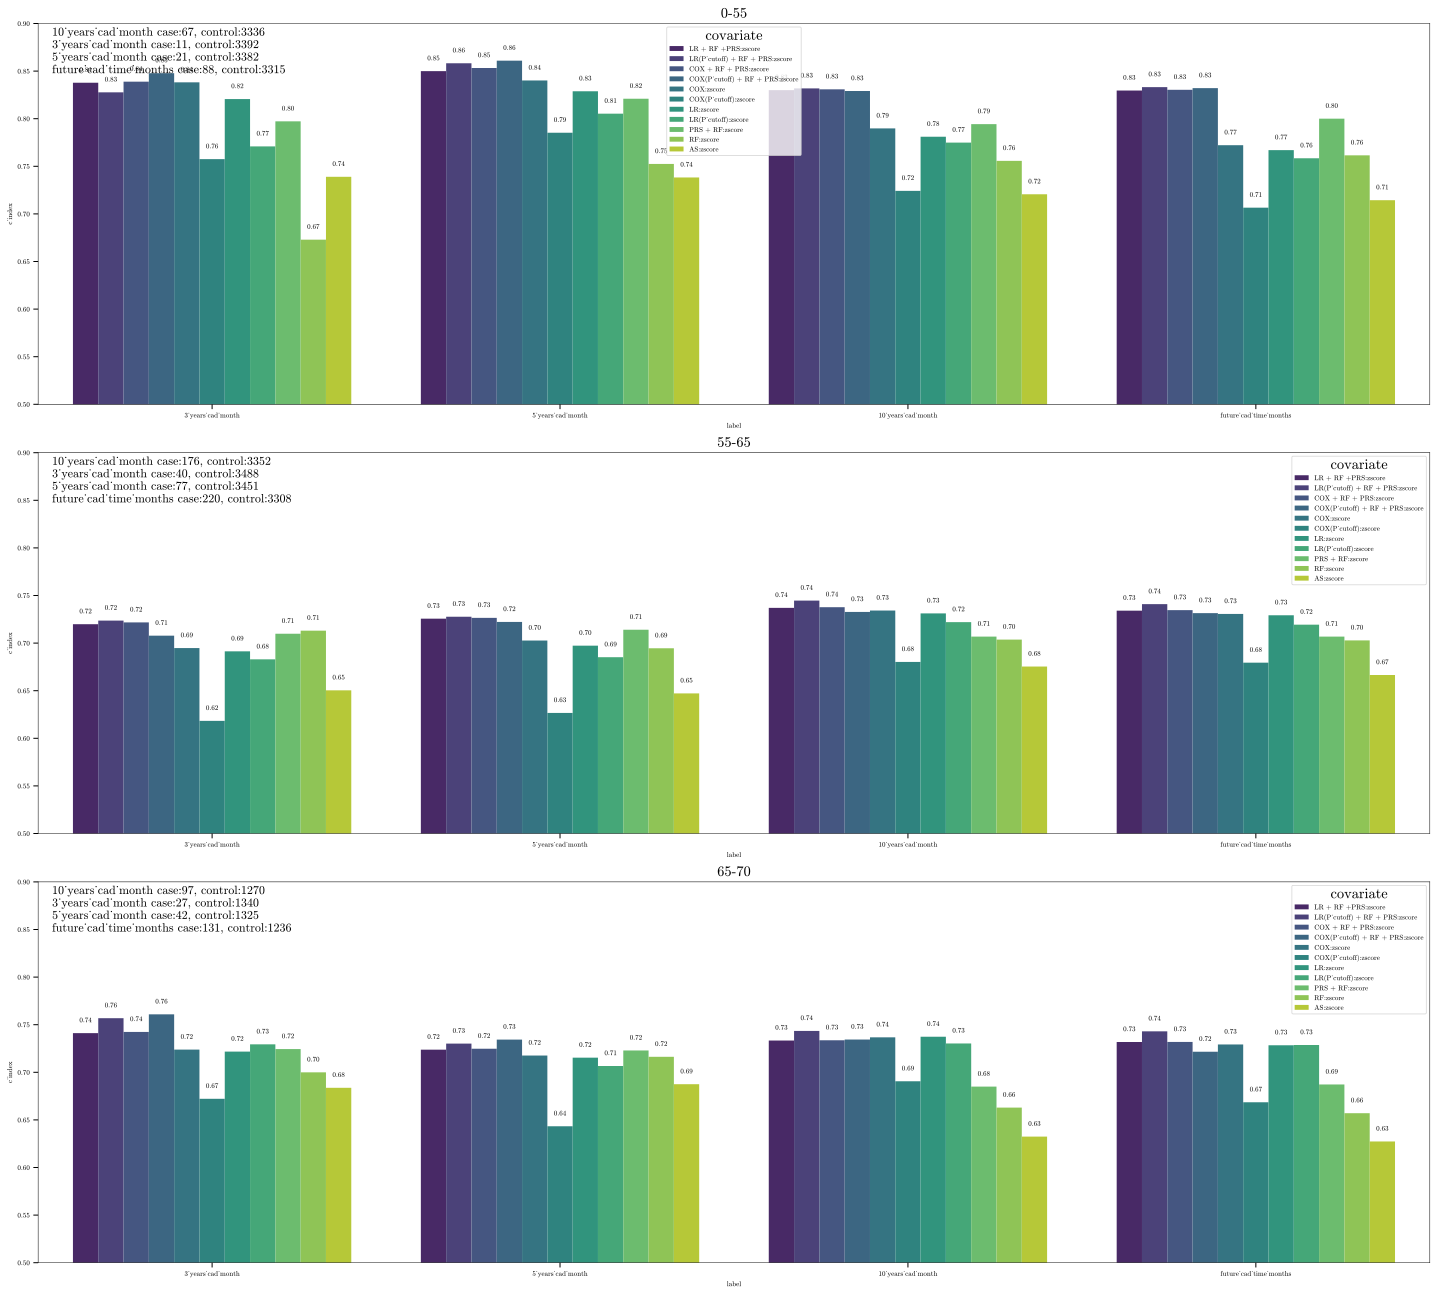

In [90]:
hue_order = [
    "LR + RF +PRS:zscore",
    "LR(P_cutoff) + RF + PRS:zscore",
    "COX + RF + PRS:zscore",
    "COX(P_cutoff) + RF + PRS:zscore",
    "COX:zscore",
    "COX(P_cutoff):zscore",
    "LR:zscore",
    "LR(P_cutoff):zscore",
    "PRS + RF:zscore",
    "RF:zscore",
    "AS:zscore",
]
nrow = age_bin_result_df["age_bin"].unique().shape[0]

fig, axes = plt.subplots(nrow, figsize=(20, nrow * 6))
axes = axes.flatten()
for idx, age_bin in enumerate(age_bin_result_df["age_bin"].unique()):
    plt_data = age_bin_result_df[age_bin_result_df["age_bin"] == age_bin].query(
        "n_case > 10"
    )
    ax = axes[idx]
    sns.barplot(
        plt_data,
        x="label",
        # y="exp(coef)",
        y="c_index",
        hue="covariate",
        hue_order=hue_order,
        palette="viridis",
        ax=ax,
    )
    ax.set_title(f"{age_bin}")
    texts = ""
    for i, row in plt_data.groupby("label"):
        label_case_num = row["n_case"].values[0]
        label_control_num = row["n_control"].values[0]
        texts += f"{i} case:{label_case_num}, control:{label_control_num}\n"
    ax.text(
        0.01,
        0.99,
        texts,
        fontsize=12,
        ha="left",
        va="top",
        transform=ax.transAxes,
    )
    for patch in ax.patches:
        if patch.get_height() > 0:
            ax.text(
                patch.get_x() + patch.get_width() / 2,
                patch.get_height() + 0.01,
                f"{patch.get_height():.2f}",
                ha="center",
                va="bottom",
            )
    ax.set_ylim(0.5, 0.9)
fig.tight_layout()
fig.savefig("rbc.png", dpi=400)

## 预测 3 5 10 冠心病发病风险

In [ ]:
print("This is wang lab ")

In [ ]:
from lifelines import CoxPHFitter
from collections import defaultdict
from ppp_aging.model import generate_states_cols, cal_corr


cph = CoxPHFitter()
diff_methods_logit_list = []
for E, T in [[E_3, T_3], [E_5, T_5], [E_10, T_10]]:
    print(f"**************************E:{E} and T:{T}*************************")
    current_surivival_list = []
    current_stat = cal_corr(
        test_with_score,
        x=[f"{i}:zscore" for i in methods],
        y=E,
        model_type="logit",
        return_all=False,
        bootstrap_nums=1000,
    )
    current_stat["N"] = test_with_score.shape[0]

    # break
    current_stat = generate_states_cols(current_stat, pvalue_col="pvalue")
    current_stat["formatted_qval"] = current_stat["pvalue"].apply(lambda x: f"{x:.2e}")

    diff_methods_logit_list.append(current_stat)
    print(f"**************************E:{E} and T:{T}*************************")

diff_methods_logit_df = pd.concat(diff_methods_logit_list).reset_index(drop=True)

In [ ]:
diff_methods_logit_df

In [ ]:
import forestplot as fp


fp.mforestplot(
    diff_methods_logit_df,
    estimate="AUC",
    ll="AUC_LCI",
    hl="AUC_UCI",
    varlabel="var",
    # variable_header="methods",
    ylabel="",
    xlabel="AUC",
    figsize=(6, 10),
    # capitalize="capitalize",
    table=True,
    sort=True,
    sortby="AUC",
    color_alt_rows=True,
    # ax=ax,
    # mcolor=["#CC6677", "#4477AA", "#CC6677"],
    mcolor=["#FAD02E", "#FF6B6B", "#C5E1A5"],
    model_col="exposure",
    # modellabels=["3_years_cad_month", "5_years_cad_month", "10_years_cad_month"],
    xlim=(0.7, 0.82),
    # return_df=True,
    # Additional kwargs for customizations
    **{
        "markersize": 30,
        # override default vertical offset between models (0.0 to 1.0)
        "offset": 0.35,
        "xlinestyle": (0, (10, 5)),  # long dash for x-reference line
        "xlinecolor": ".8",  # gray color for x-reference line
    },
)
# plt.savefig("4_survival_forestplot.png", dpi=400, bbox_inches="tight")

In [ ]:
incident_cad_metrics = pd.read_csv("4_incident_cad_metrics.csv")
incident_cad_metrics.head(1)

In [ ]:
diff_methods_logit_df.head(1)

In [ ]:
diff_methods_logit_df["combination"] = (
    diff_methods_logit_df["var"].str.split(":").str[0]
)
diff_methods_logit_df["task"] = diff_methods_logit_df["exposure"]


# incident cad format
incident_cad_metrics = pd.read_csv("4_incident_cad_metrics.csv")
incident_cad_metrics["task"] = "incident_cad"
del incident_cad_metrics["feature"]
all_cad_metrics = pd.concat(
    [
        incident_cad_metrics,
        diff_methods_logit_df[[col for col in incident_cad_metrics.columns]],
    ]
)

In [ ]:
all_cad_metrics.head(1)

In [ ]:
import forestplot as fp


fp.mforestplot(
    all_cad_metrics,
    estimate="AUC",
    ll="AUC_LCI",
    hl="AUC_UCI",
    varlabel="combination",
    # variable_header="methods",
    ylabel="",
    xlabel="AUC",
    figsize=(6, 10),
    # capitalize="capitalize",
    table=True,
    sort=True,
    sortby="AUC",
    color_alt_rows=True,
    # ax=ax,
    # mcolor=["#CC6677", "#4477AA", "#CC6677"],
    # mcolor=["#FAD02E", "#FF6B6B", "#C5E1A5", "#9BBB59"],
    mcolor=["#FAD02E", "#FF6B6B", "#C5E1A5", "#80DEEA"],
    model_col="task",
    # modellabels=["3_years_cad_month", "5_years_cad_month", "10_years_cad_month"],
    xlim=(0.7, 0.82),
    # return_df=True,
    # Additional kwargs for customizations
    # **{
    #     "markersize": 30,
    #     # override default vertical offset between models (0.0 to 1.0)
    #     "offset": 0.35,
    #     "xlinestyle": (0, (10, 5)),  # long dash for x-reference line
    #     "xlinecolor": ".8",  # gray color for x-reference line
    # },
)
# plt.savefig("4_survival_forestplot.png", dpi=400, bbox_inches="tight")

## 模型预测综合表格（用于补充材料）

- incident_cad 
- 多年预测效果

In [ ]:
diff_methods_logit_df["combination"] = diff_methods_logit_df["var"].apply(
    lambda x: x.split(":")[0]
)
diff_methods_logit_df_metric = (
    diff_methods_logit_df[
        ["combination", "exposure"]
        + [f"{i}{j}" for i in all_metrics for j in ["", "_LCI", "_UCI"]]
    ]
    .rename(columns={"exposure": "task"})
    .pivot_table(index="combination", columns="task")
    .swaplevel(axis=1)
    .sort_index(axis=1, level=0)
)
diff_methods_logit_df_metric.columns.names = ["task", "metric"]
all_method_metrics = diff_methods_logit_df_metric.merge(
    incident_cad_metrics, left_index=True, right_index=True
)

all_method_metrics

In [ ]:
all_metrics = ["AUC", "ACC", "Macro_F1", "Sensitivity", "Specificity", "APR"]

incident_cad_metrics = pd.read_csv("4_incident_cad_metrics.csv")
# diff_methods_logit_df
incident_cad_metrics["task"] = "incident_cad"

incident_cad_metrics.set_index("combination", inplace=True)


del incident_cad_metrics["feature"]
del incident_cad_metrics["task"]
incident_cad_metrics.columns = pd.MultiIndex.from_tuples(
    [("Incident_CAD", i) for i in incident_cad_metrics.columns],
    names=["task", "metric"],
)
incident_cad_metrics

In [ ]:
incident_cad_metrics.to_pickle("4.2_plot_incident_cad.pkl")
all_method_metrics.to_pickle("4.2_plot_future_cad.pkl")

## 输出最终所有结果的表格

In [ ]:
all_method_metrics_for_show = all_method_metrics.copy()
# AUC => AUC[AUC_LCI, AUC_UCI]
for level0 in all_method_metrics_for_show.columns.levels[0]:
    for metrics in all_metrics:
        all_method_metrics_for_show.loc[:, (level0, metrics)] = (
            all_method_metrics_for_show.loc[
                :, (level0, [metrics, f"{metrics}_LCI", f"{metrics}_UCI"])
            ].apply(lambda x: f"{x[0]:.2f} [{x[1]:.2f}-{x[2]:.2f}]", axis=1)
        )


all_method_metrics_for_show.loc[
    :,
    [
        (level0, level1)
        for level0 in ["Incident_CAD", "3_years_cad", "5_years_cad", "10_years_cad"]
        for level1 in ["AUC", "ACC", "Macro_F1", "Sensitivity", "Specificity", "APR"]
    ],
].to_excel("4_all_methods_tasks.xlsx", index=True)

In [ ]:
!pip install confidenceinterval